# Цены на жилье

В данном решении рассматривается, мой подход к интерпретации набора данных соревнования [Kaggle House Price](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview)

## Описание

Если спросить покупателя: "Какой дом твоей мечты?". Скорее всего, он не упомянет о высоте потолков в подвале ил об удаленности от восточно-западной ЖД, но, как показывают данные, большее влияния на на цену оказывает количество спален и наличие беленькой оградки вокруг дома.

С помощью 79 параметров, описывающих (почти все) характеристики жилых домов в городе Эймс штата Айова, в этом соревновании необходимо предсказать цену каждого дома.

Предсказанные данные должны иметь следующий формат (Номар дома, Цена):

```
Id,SalePrice
1461,169000.1
1462,187724.12
1463,175221.1
```

## Параметры (поля) данных

```
SalePrice: цена в долларах, это тот параметр, который нужно предсказать.
MSSubClass: класс строения
MSZoning: территориальная классификация
LotFrontage: ширина улицичной (фронтальной) стороны объекта, в футах
LotArea: площадь объекта в квадратных футах
Street: тип подъездной дороги к дому
Alley: тип пешеходной дороги к дому
LotShape: форма объекта
LandContour: уровень площадки объекта
Utilities: тип благоустройства
LotConfig: конфигурация
LandSlope: наклон объекта
Neighborhood: расположение в пределах города
Condition1: удаленность от трассы или ЖД
Condition2: удаленность от трассы или ЖД (в случае нескольких магистралей)
BldgType: тип объекта
HouseStyle: стиль объекта
OverallQual: качество материалов отделки
OverallCond: уровень состояния
YearBuilt: дата постройки
YearRemodAdd: дата капремонта
RoofStyle: тип крыши
RoofMatl: материал крыши
Exterior1st: тип облицовки
Exterior2nd: тип облицовки (в случае нескольких)
MasVnrType: тип кладки
MasVnrArea: площадь кладки в квадратных футах
ExterQual: качество облицовки
ExterCond: состояние облицовки
Foundation: тип фундамента
BsmtQual: высота подвала
BsmtCond: общее состояние подвала
BsmtExposure: цоколь
BsmtFinType1: качество облицовки подвала
BsmtFinSF1: площадть облицовки подвала первого типа в футах
BsmtFinType2: качество облицовки подвала второго типа (при наличие)
BsmtFinSF2: площадь обшицовки подвала второго типа в футах
BsmtUnfSF: необлицованная площаль подвала в футах
TotalBsmtSF: общая площадь подвала
Heating: тип отопления
HeatingQC: качество и сотояние отопления
CentralAir: система вентилаяции
Electrical: электрика
1stFlrSF: площадь первого этажа в футах
2ndFlrSF: площадь второго этажа в футах
LowQualFinSF: Площаь перекрытий (на всех этажах) в футах
GrLivArea: Надземная (цокольная) жилая площадь в футах
BsmtFullBath: Ванная комната в подвале
BsmtHalfBath: Ванная комната на цоколе
FullBath: Ванная комнтата в жилой зоне
HalfBath: Углубленная ванная комната в жилой зоне
Bedroom: Количество  спален в жилой зоне
Kitchen: Количество кухонь
KitchenQual: Качество кухонь
TotRmsAbvGrd: Общее количество жилих комнат (без санузлов)
Functional: Рейтинг функциональности дома
Fireplaces: Количество каминов (печей)
FireplaceQu: Качество каминов (печей)
GarageType: Расположение гаража
GarageYrBlt: Год постройки гаража
GarageFinish: Интерьер гаража
GarageCars: Размер гаража в машиноместах
GarageArea: Размер гаража в квадтарных футах
GarageQual: Качество гаража
GarageCond: Состояние гаража
PavedDrive: Мощенный заезд
WoodDeckSF: Площадь деревянного настила в квадратных футах
OpenPorchSF: Площадь открытой веранды в квадратных футах
EnclosedPorch: Площадь закрытой веранды в квадратных футах
3SsnPorch: Площадь межсезонной веранды в квадратных футах
ScreenPorch: Площадь крыльца в квадратных футах
PoolArea: Площадь бассейна в квадратных футах
PoolQC: Качество бассейна
Fence: Качество ограды
MiscFeature: Особенности не вошедшие в другие параметры
MiscVal: Количество особенностей
MoSold: Месяц продажи
YrSold: Года продажи
SaleType: Тип продажи
SaleCondition: Условия продажи
```

## Решение

### 1. Загрузка данных

Загрузим данные с помощью стандартной библиотеки kaggle

```
pip install kaggle
kaggle competitions download -c house-prices-advanced-regression-techniques
unzip house-prices-advanced-regression-techniques.zip
```

### 2. Загрузка данных в пандас

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 3. Предобработка данных

#### a. Поиск пропусков

Выведу столбцы только с пропусками:

In [4]:
df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

Из названия столбцов видно, что информация и типы данных различаются, следовательно обрабатывать следует по разному.

Столбец **LotFrontage** (Ширина фронтальной части объекта), т.е. ширина участка смотрящего на улицу является числовым значением, данных отсутствует окло 10%, поэтому данный столбец удалять не стоит, т.к. он числовой его стоит заполнить средним значением

In [5]:
LotFrontage_mean = df["LotFrontage"].mean()
df["LotFrontage"] = df["LotFrontage"].fillna(LotFrontage_mean)

Следующий столбец **Alley** пешеходная дорожка. В данном поле отсутсутсвтует 1369 значений из 1460. Из значений которые есть очевидно, что дорога к дому либо посыпаны гравием, либо вымощена.
Можно предположить, что большинство ходят по тропинкам, либо используются подъездную дорогу в качестве пешеходной. Пустое значение можно так же назвать other.

In [6]:
df["Alley"].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [7]:
df["Alley"] = df["Alley"].fillna("other") 

В столбце **MasVnrType** (тип кладки), не хватает примерно половины значений от общего числа, а в имеющихся можно различить такие слова как, каменная кладка, облицовочный кирпич и вероятнее всего кирпич с цементом. Следовательно, остальная половина домов имеет например плиточную кладку, пеноблочную, газо- шлако бетонную или наконец из древесных материалов.  Пропуски, в данном случае, можно заполнить словом **other**, для упрощения последующего машинного анализа. 

In [8]:
df["MasVnrType"].value_counts()

MasVnrType
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [9]:
MasVnrType_list = df["MasVnrType"].dropna().tolist()
df["MasVnrType"] = df["MasVnrType"].fillna("Other")

Поле с цифровыми значениями **MasVnrArea** (площадь кладки) тесно связано, с предыдущим полем, типа кладки. Естественно что у деревянного дома площади кладки не будет. В данном случае можно выставить нулевую площадь, т.к. таких всего 8 и они скорее всего из бруса.

In [10]:
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

Следующие поля описывают характеристики подвала:

**BsmtQual** (Качество подвала) - 37 пропусков
**BsmtCond** (Состояние подвала) - 37 пропуков
**BsmtExposure** (Цоколь) - 38 пропусков
**BsmtFinType1** (Тип 1 облицовки подвала) - 37 пропусков
**BsmtFinType2** (Тип 2 облицовки подвала) - 38 пропусков

Наблюдается закономерность, во всех полях почти одиноковое количество пропусков. Ответ кроется в том поле, которое с одной стороны не имеет пропусков, но с другой тесно связано с подвалом это **TotalBsmtSF** общая площадь подвала.
Посчитаем всевозможные варианты площадей и обнаружим что площдать равная 0 (нулю) имеет 37 повторений.
Следовательно, пропуски в тех местах где нет подвала. 
То, что два раза встретилось 38, объясняется тем, что цоколь может быть не у всех подвалов и облицовка второго типа тоже не увсех. Следовательно нужно в полях с пропусками, где общая площадь равна 0 прописать "No".

In [11]:
df["TotalBsmtSF"].value_counts()

TotalBsmtSF
0       37
864     35
672     17
912     15
1040    14
        ..
1838     1
1581     1
707      1
611      1
1542     1
Name: count, Length: 721, dtype: int64

In [12]:
df.loc[df["TotalBsmtSF"] == 0, "BsmtQual"] = "No"

In [13]:
df.loc[df["TotalBsmtSF"] == 0, "BsmtCond"] = "No"

In [14]:
df.loc[df["TotalBsmtSF"] == 0, "BsmtExposure"] = "No"

In [15]:
df["BsmtExposure"] = df["BsmtExposure"].fillna("No") # т.к. было 38 один подвал без цокольной части выставим явно No

In [16]:
df.loc[df["TotalBsmtSF"] == 0, "BsmtFinType1"] = "No"

In [17]:
df.loc[df["TotalBsmtSF"] == 0, "BsmtFinType2"] = "No"

In [18]:
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("No") # т.к. было 38 один подвал без отделки типа №2, выставим явно No

**Electrical** - электрика. Всего один пропуск, можно заменить на самый популярный, но я брошу жребий.

In [19]:
df["Electrical"].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: count, dtype: int64

Создам список всех значений и рандомно присвою его пропуску

In [20]:
Electrical_list = df["Electrical"].dropna().tolist()
df["Electrical"] = df["Electrical"].fillna(random.choice(Electrical_list))

**FireplaceQu** - Качество камина (печи) пропусков почти половина от общего числа 690. 

In [21]:
df["Fireplaces"].value_counts()

Fireplaces
0    690
1    650
2    115
3      5
Name: count, dtype: int64

**Fireplaces** количество каминов. Ситуация схожая с подвалами именно, 690 объектов не имеют печного (каминного) отопления. Заменим пропуски на "No"

In [22]:
df.loc[df["Fireplaces"] == 0, "FireplaceQu"] = "No"

Набор полей описывающих гаражи: 

- **GarageType** - Расположение гаража
- **GarageYrBlt** - Год постройки гаража
- **GarageFinish** - Интерьер гаража
- **GarageQual**- Качество гаража
- **GarageCond**- Состояние гаража

Ответ о пропусках кроется в двух не упомянутых тут полях гаража:

- GarageCars: Размер гаража в машиноместах имеет 81 значений с 0 машиномест
- GarageArea: Размер гаража в квадтарных футах, так же имеет 81 значение с 0 квадратных футов

In [23]:
df["GarageCars"].value_counts()

GarageCars
2    824
1    369
3    181
0     81
4      5
Name: count, dtype: int64

In [24]:
df["GarageArea"].value_counts()

GarageArea
0      81
440    49
576    47
240    38
484    34
       ..
320     1
594     1
831     1
878     1
192     1
Name: count, Length: 441, dtype: int64

In [25]:
df.loc[df["GarageArea"] == 0, "GarageType"] = "No"

Год постройки гаража, почему то имеет вещественный формат, преобразуем его в целочисленный, и заполним пропуски нулями

In [26]:
df["GarageYrBlt"] = df["GarageYrBlt"].fillna(0).astype(int)
#df.loc[df["GarageArea"] == 0, "GarageYrBlt"] = 0

In [27]:
df["GarageYrBlt"].value_counts()

GarageYrBlt
0       81
2005    65
2006    59
2004    53
2003    50
        ..
1927     1
1900     1
1906     1
1908     1
1933     1
Name: count, Length: 98, dtype: int64

In [28]:
df.loc[df["GarageArea"] == 0, "GarageFinish"] = "No"

In [29]:
df.loc[df["GarageArea"] == 0, "GarageQual"] = "No"

In [30]:
df.loc[df["GarageArea"] == 0, "GarageCond"] = "No"

Поля описывающие бассены:
-  **PoolQC** - Качество бассейна - 1453 пропуска

посмотрим на родственное поле без пропусков
- **PoolArea** - площадь бассейна, о чудо опять 1453 бассейна имею площадь 0 футов )

Следователно заменить строкой "No" пропуски в поле качество бассейна

In [31]:
df["PoolArea"].value_counts()

PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64

In [32]:
df["PoolQC"].value_counts() # Если нет бассейна поставить "No"

PoolQC
Gd    3
Ex    2
Fa    2
Name: count, dtype: int64

In [33]:
df["PoolQC"] = df["PoolQC"].fillna("No")

**Fence** - американский символ - белый заборчик есть только у 10% американцев: 1179 пропусков из 1460

In [34]:
df["Fence"] = df["Fence"].fillna("No")

Не смотря на 1406 пропусков из 1460 в столбце  **MiscFeature** с фичами не следует удалять т.к. в них например укзано, что есть два гаража, это хорошая прибавка к цене объекта. Если фич у дом нет, то и пишем "No"

In [35]:
df["MiscFeature"].value_counts() # нет смысла в удаление пропусков т.к. 1406 пропусков из 1460

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: count, dtype: int64

In [36]:
df["MiscFeature"] = df["MiscFeature"].fillna("No") # заменим пропуски на "No"

In [37]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

Итого: у нас не осталось полей с пропущенными значниями, и не пришлось удалять столбцы, которые могут очень понадобиться в соревновании Kaggle на этапе машинного обучения

####  b. дублирующиеся строки 

Дублирующихся строк не обнаружено

In [38]:
df.duplicated().sum()

0

#### c. типы данных в столбцах

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Отобразим только не цифровые столбцы

In [40]:
non_numeric_columns = df.select_dtypes(include=['object']).columns
non_numeric_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
len(df.select_dtypes(include=['object']).columns)

43

43 Столбца имееют объектный тип данных, для того чтобы столбцы и образцы их данных поместились на экран разделю на три части вывод:

In [42]:
third = len(non_numeric_columns)//3
df[non_numeric_columns[:third]]


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle
0,RL,Pave,other,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable
1,RL,Pave,other,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable
2,RL,Pave,other,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable
3,RL,Pave,other,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable
4,RL,Pave,other,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,other,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable
1456,RL,Pave,other,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable
1457,RL,Pave,other,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable
1458,RL,Pave,other,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip


In [43]:
df[non_numeric_columns[third:third*2]]

,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC
0,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex
1,CompShg,MetalSd,MetalSd,Other,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex
2,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex
3,CompShg,Wd Sdng,Wd Shng,Other,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd
4,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,CompShg,VinylSd,VinylSd,Other,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex
1456,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA
1457,CompShg,CemntBd,CmentBd,Other,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex
1458,CompShg,MetalSd,MetalSd,Other,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd


In [44]:
df[non_numeric_columns[third*2:]]

,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Y,SBrkr,Gd,Typ,No,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
1,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
2,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
3,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,No,No,No,WD,Abnorml
4,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,No,No,No,WD,Normal
1456,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,No,MnPrv,No,WD,Normal
1457,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,No,GdPrv,Shed,WD,Normal
1458,Y,FuseA,Gd,Typ,No,Attchd,Unf,TA,TA,Y,No,No,No,WD,Normal


Из представленных столбцов мы ранее откорекртировали все цифровые типы. 
Но, найден один CentralAir (Центральная вентиляция), который имеет всего два значения Y и N.
Переведем его в булев тип где True - есть центральная вентиляция. False - нет центральной вентиляции

In [45]:
df["CentralAir"].value_counts()

CentralAir
Y    1365
N      95
Name: count, dtype: int64

In [46]:
df["CentralAir"] = df["CentralAir"].map({"Y": 1, "N": 0}).astype(bool)

In [47]:
df["CentralAir"].value_counts()

CentralAir
True     1365
False      95
Name: count, dtype: int64

### 4. Разведочный анализ данных (EDA)

#### a. Каково распределение целевой переменной 'SalePrice'? Есть ли какие-либо выбросы? 

In [48]:
import seaborn as sns

По продажем помимо цены есть еще столбцы:

MoSold: Месяц продажи
YrSold: Года продажи
SaleType: Тип продажи
SaleCondition: Условия продажи

Объединим год и месяц и преобразуем в формат даты новый столбец

In [49]:
df['DateSold'] = pd.to_datetime(df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str) + '-' + pd.Series([random.randint(1, 28) for _ in range(len(df))]).astype(str))

In [50]:
df['DateSold']

0      2008-02-14
1      2007-05-26
2      2008-09-09
3      2006-02-14
4      2008-12-18
          ...    
1455   2007-08-18
1456   2010-02-20
1457   2010-05-24
1458   2010-04-15
1459   2008-06-13
Name: DateSold, Length: 1460, dtype: datetime64[ns]

In [51]:
import matplotlib.pyplot as plt

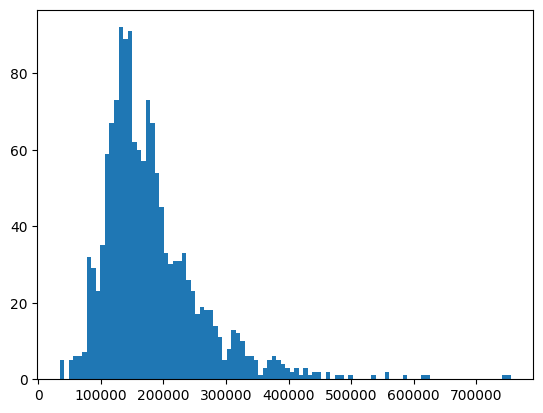

In [52]:
plt.hist(df["SalePrice"], bins=100)
plt.show();

Распределение по продажам логнормальное, присутсвтуют выбросы

Расмотрим распределение относительно других признаков

#### b. взаимосвязи между целевой переменной SalePrice и другими характеристиками

In [53]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
numeric_columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

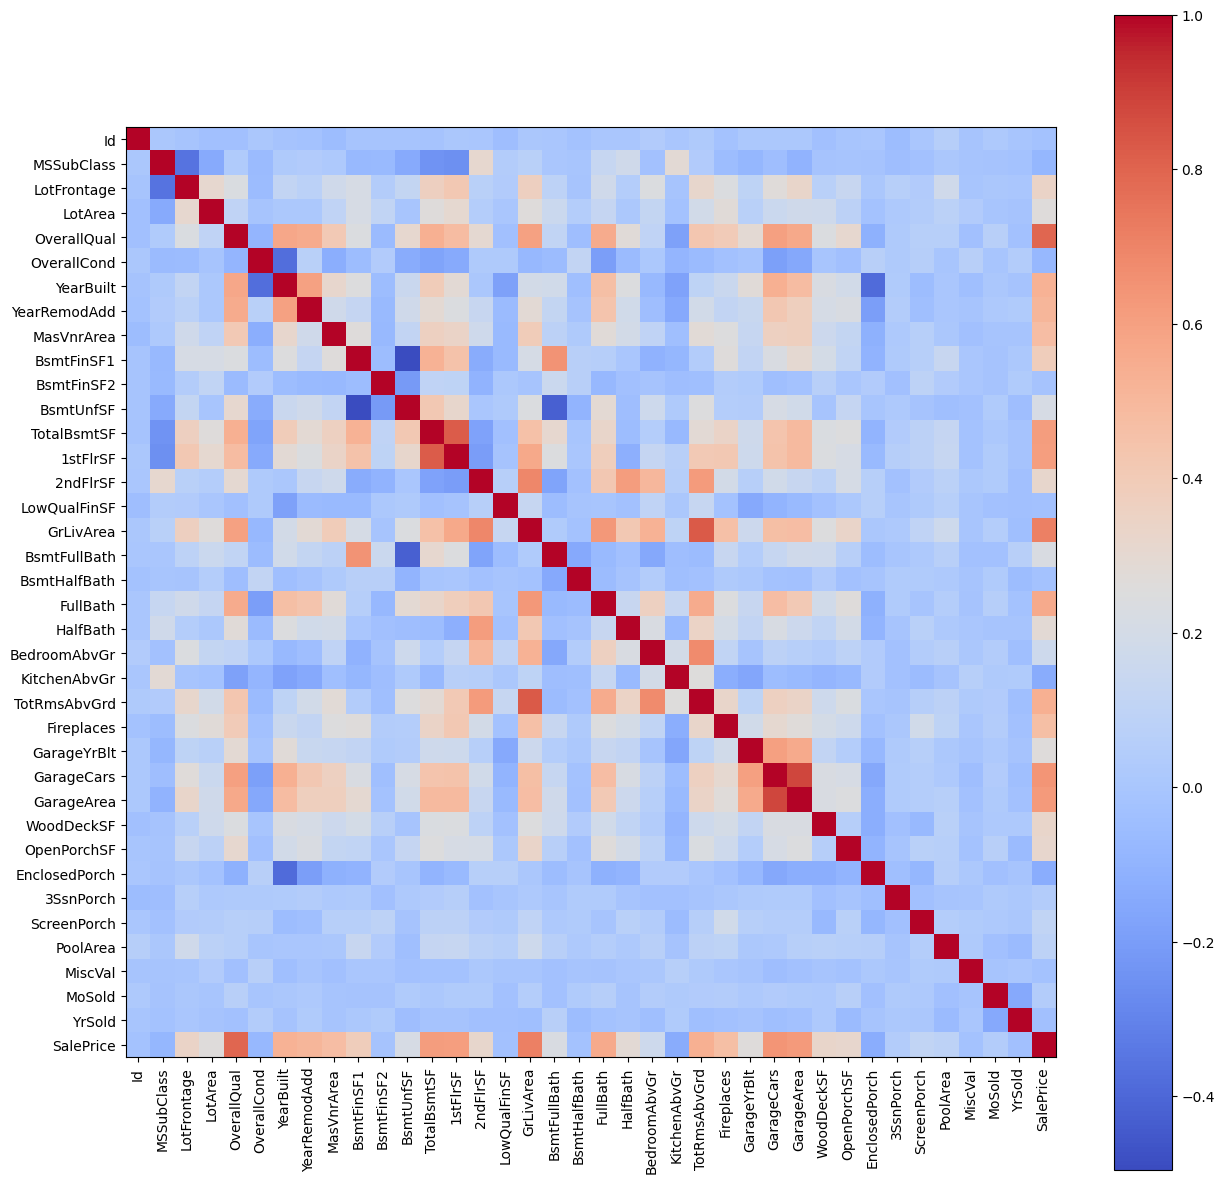

In [54]:
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(15, 15))
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.xticks(range(len(numeric_columns)), numeric_columns, rotation=90)
plt.yticks(range(len(numeric_columns)), numeric_columns)
plt.colorbar()

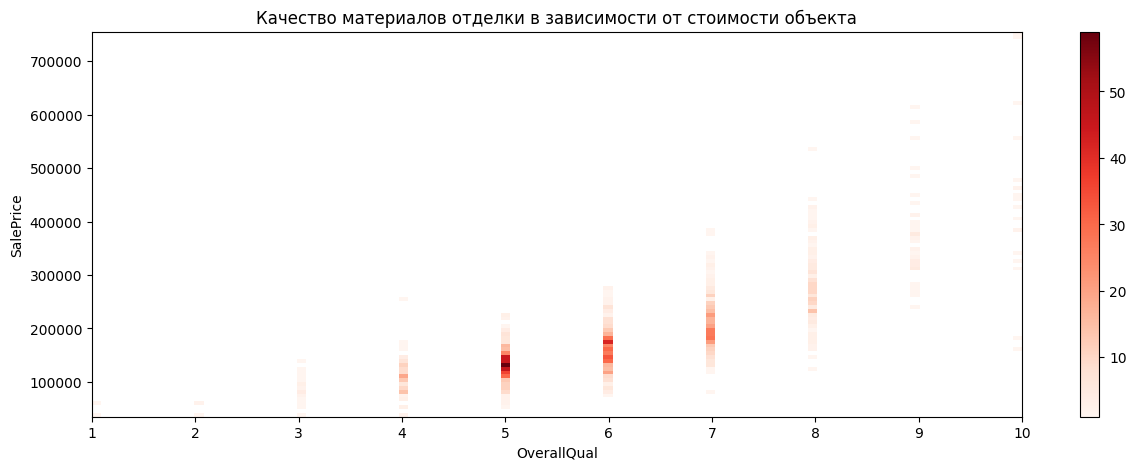

In [55]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['OverallQual'], y=df['SalePrice'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Качество материалов отделки в зависимости от стоимости объекта')
plt.colorbar()
plt.show();

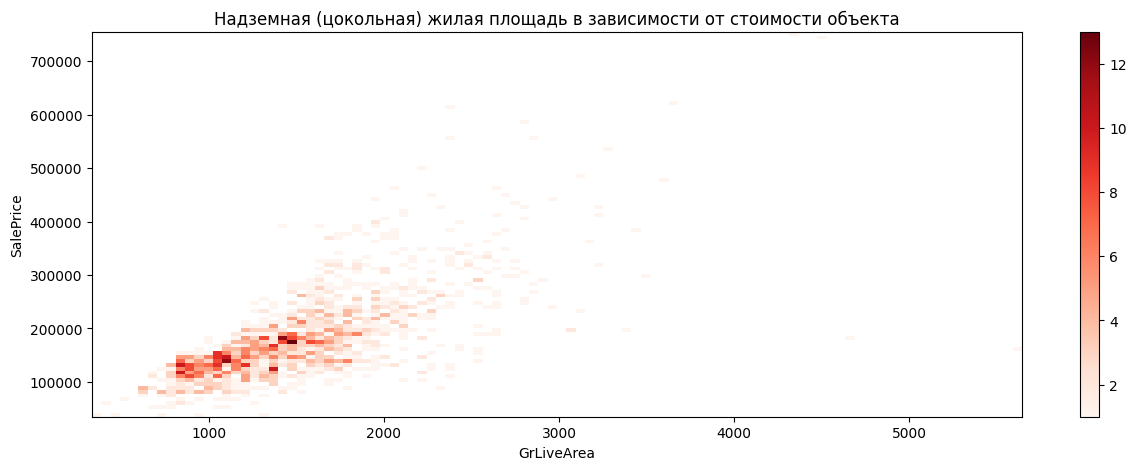

In [56]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['GrLivArea'], y=df['SalePrice'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('GrLiveArea')
plt.ylabel('SalePrice')
plt.title('Надземная (цокольная) жилая площадь в зависимости от стоимости объекта')
plt.colorbar()
plt.show();

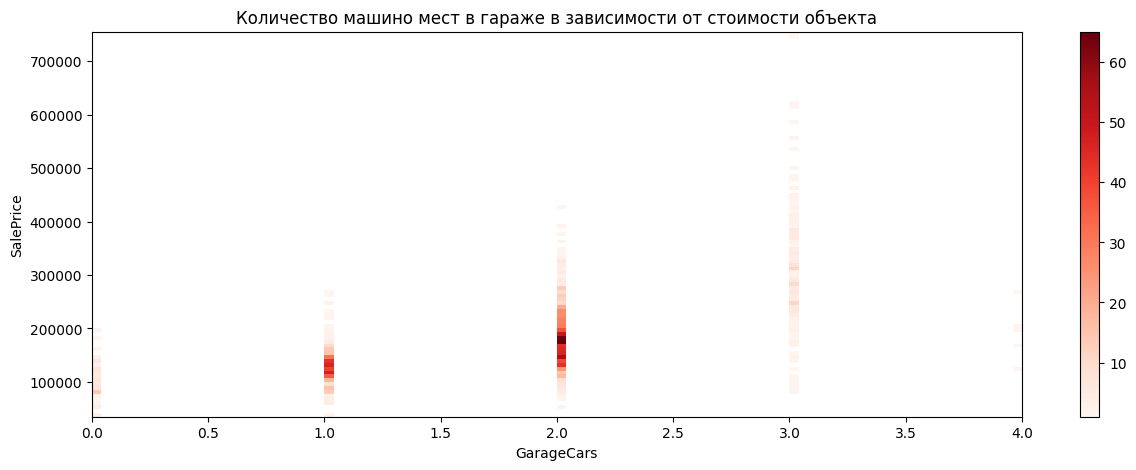

In [57]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['GarageCars'], y=df['SalePrice'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.title('Количество машино мест в гараже в зависимости от стоимости объекта')
plt.colorbar()
plt.show();

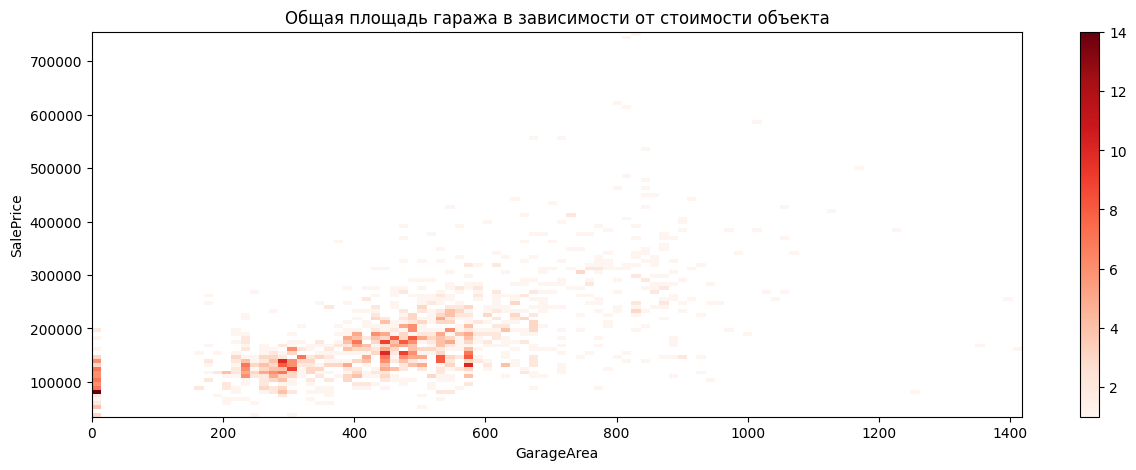

In [58]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['GarageArea'], y=df['SalePrice'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('Общая площадь гаража в зависимости от стоимости объекта')
plt.colorbar()
plt.show();

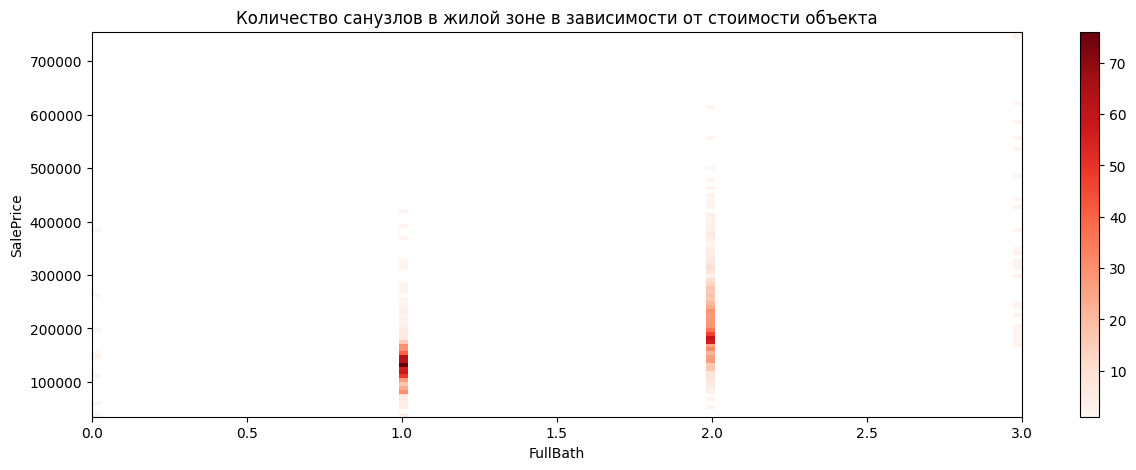

In [59]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['FullBath'], y=df['SalePrice'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('FullBath')
plt.ylabel('SalePrice')
plt.title('Количество санузлов в жилой зоне в зависимости от стоимости объекта')
plt.colorbar()
plt.show();

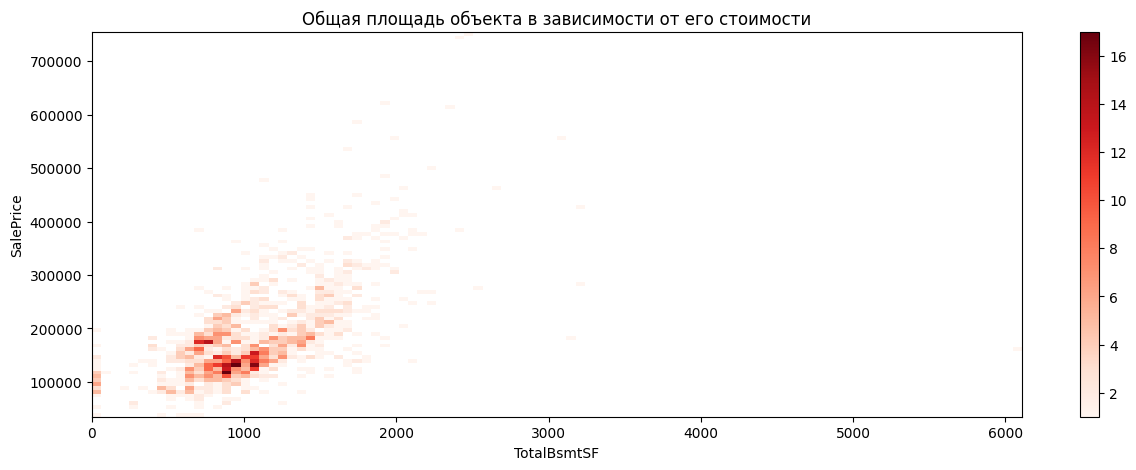

In [60]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['TotalBsmtSF'], y=df['SalePrice'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('Общая площадь объекта в зависимости от его стоимости')
plt.colorbar()
plt.show();

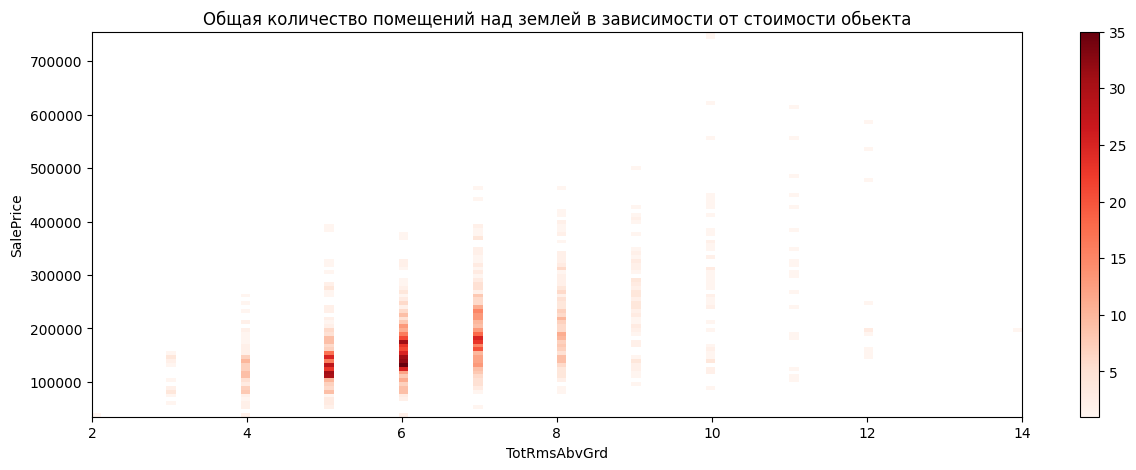

In [61]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['TotRmsAbvGrd'], y=df['SalePrice'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('SalePrice')
plt.title('Общая количество помещений над землей в зависимости от стоимости обьекта')
plt.colorbar()
plt.show();

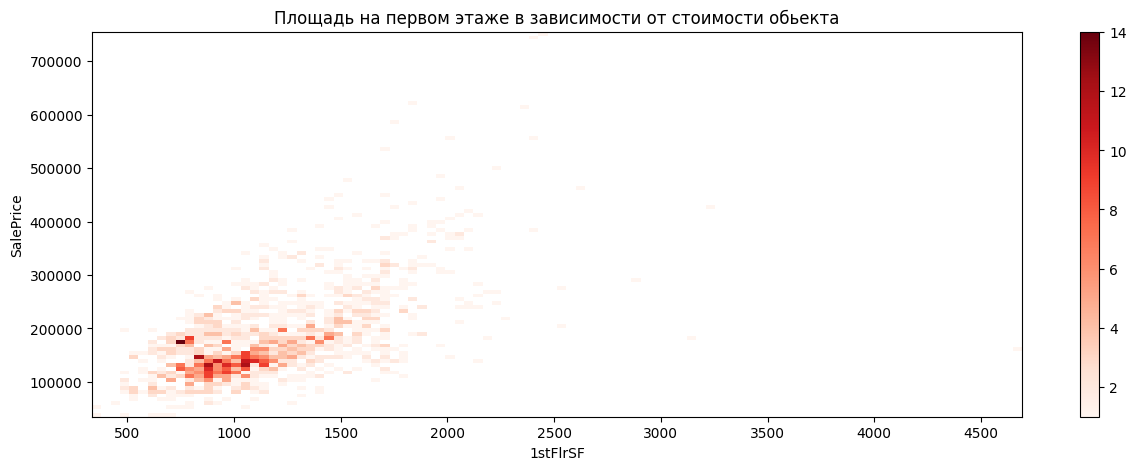

In [62]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['1stFlrSF'], y=df['SalePrice'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title('Площадь на первом этаже в зависимости от стоимости обьекта')
plt.colorbar()
plt.show();

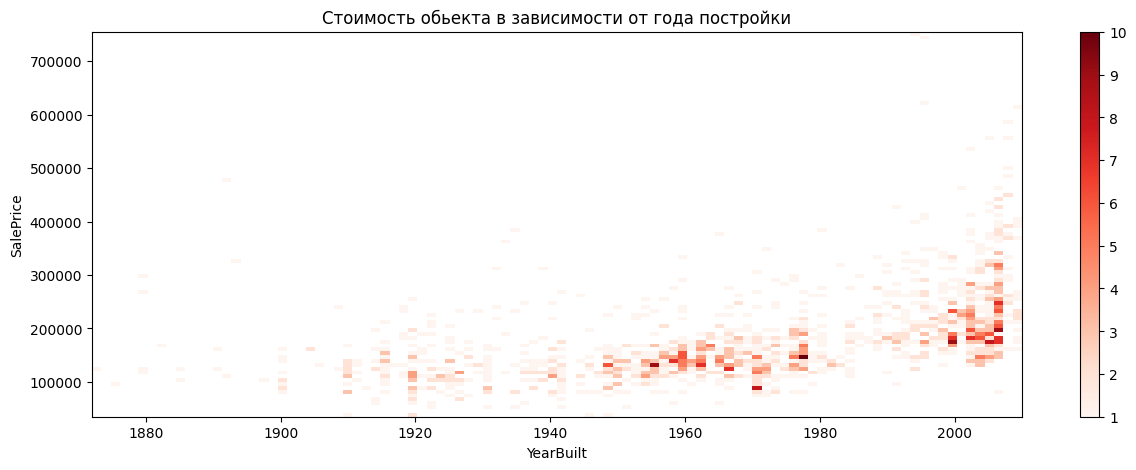

In [63]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['YearBuilt'], y=df['SalePrice'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('Cтоимость обьекта в зависимости от года постройки')
plt.colorbar()
plt.show();

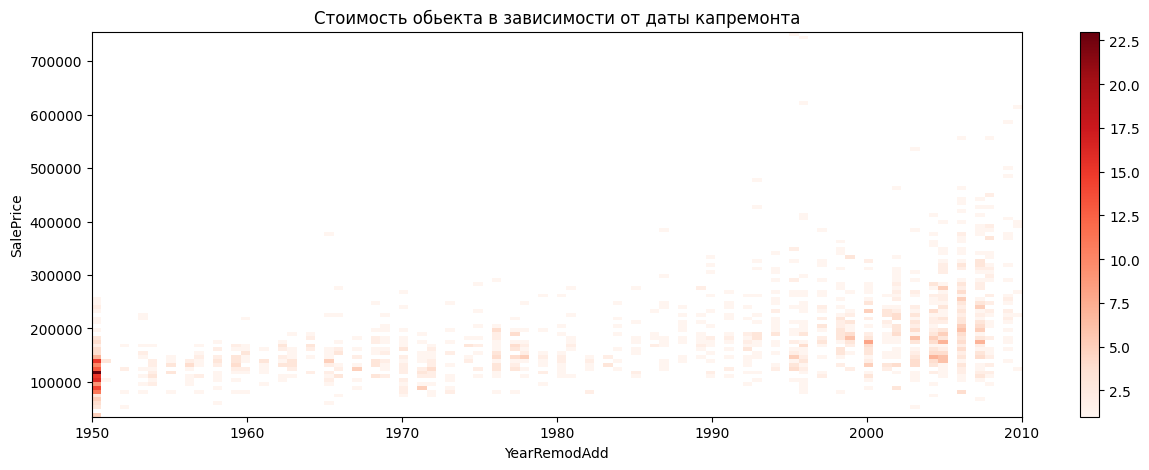

In [64]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['YearRemodAdd'], y=df['SalePrice'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('YearRemodAdd')
plt.ylabel('SalePrice')
plt.title('Cтоимость обьекта в зависимости от даты капремонта')
plt.colorbar()
plt.show();

#### c. взаимосвязи других характеристик, таких как 'OverallQual', 'GrLivArea', 'GarageCars' и т.д. d

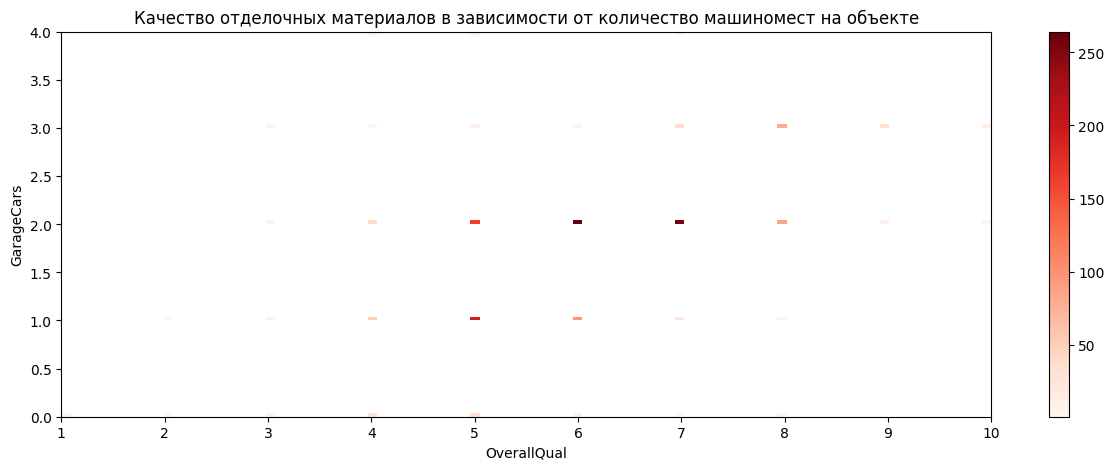

In [65]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['OverallQual'], y=df['GarageCars'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('OverallQual')
plt.ylabel('GarageCars')
plt.title('Качество отделочных материалов в зависимости от количество машиномест на объекте')
plt.colorbar()
plt.show();

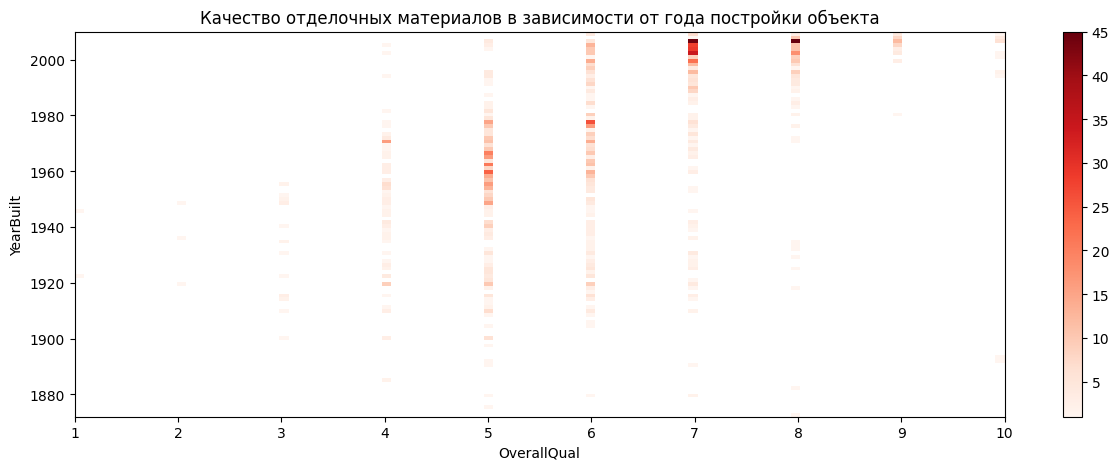

In [66]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['OverallQual'], y=df['YearBuilt'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('OverallQual')
plt.ylabel('YearBuilt')
plt.title('Качество отделочных материалов в зависимости от года постройки объекта')
plt.colorbar()
plt.show();

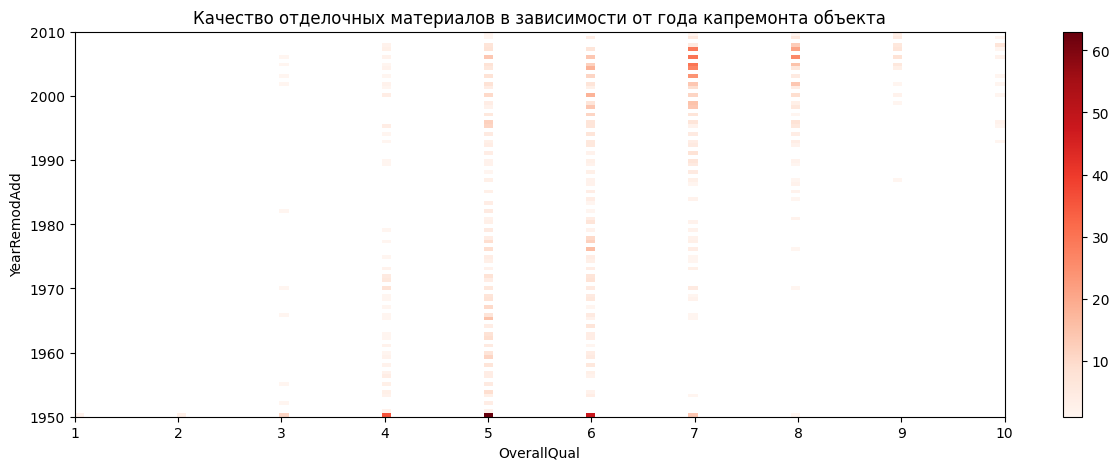

In [67]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['OverallQual'], y=df['YearRemodAdd'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('OverallQual')
plt.ylabel('YearRemodAdd')
plt.title('Качество отделочных материалов в зависимости от года капремонта объекта')
plt.colorbar()
plt.show();

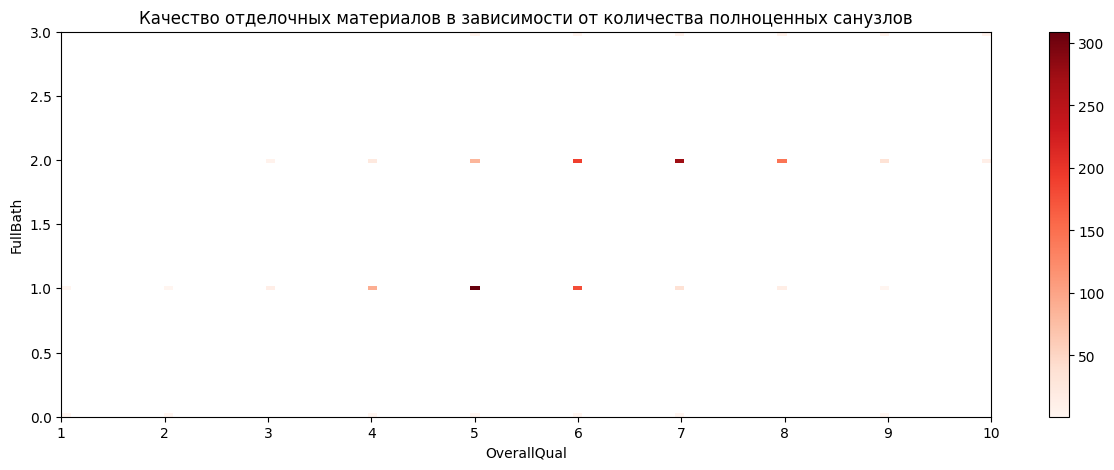

In [68]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['OverallQual'], y=df['FullBath'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('OverallQual')
plt.ylabel('FullBath')
plt.title('Качество отделочных материалов в зависимости от количества полноценных санузлов')
plt.colorbar()
plt.show();

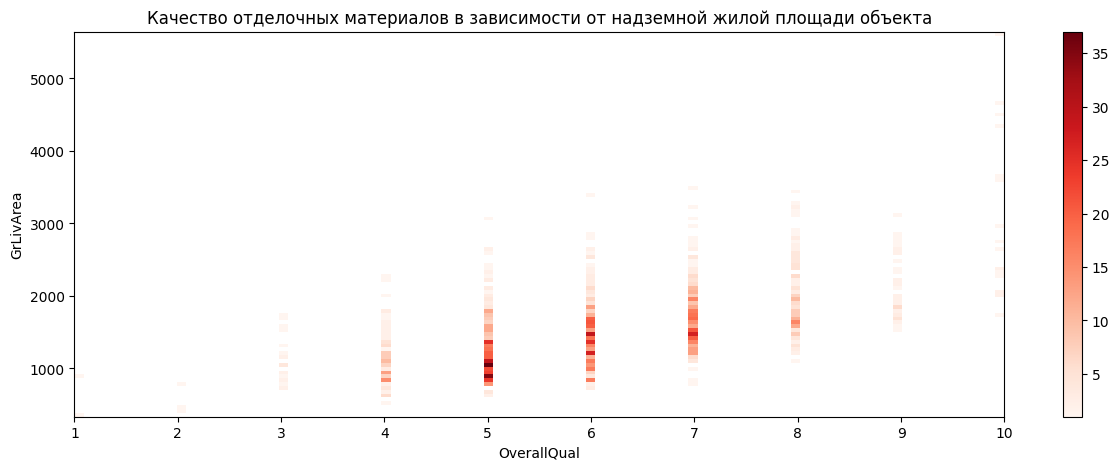

In [69]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['OverallQual'], y=df['GrLivArea'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('OverallQual')
plt.ylabel('GrLivArea')
plt.title('Качество отделочных материалов в зависимости от надземной жилой площади объекта')
plt.colorbar()
plt.show();

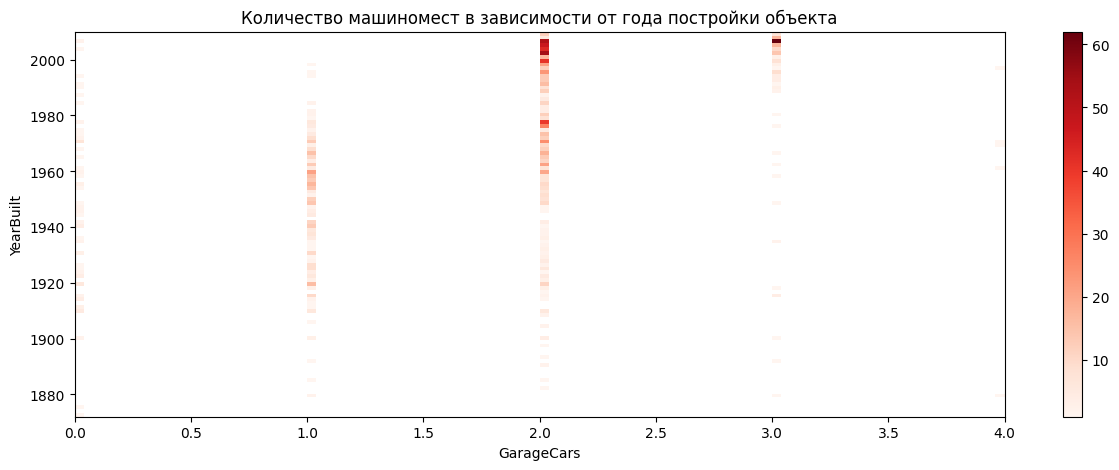

In [70]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['GarageCars'], y=df['YearBuilt'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('GarageCars')
plt.ylabel('YearBuilt')
plt.title('Количество машиномест в зависимости от года постройки объекта')
plt.colorbar()
plt.show();

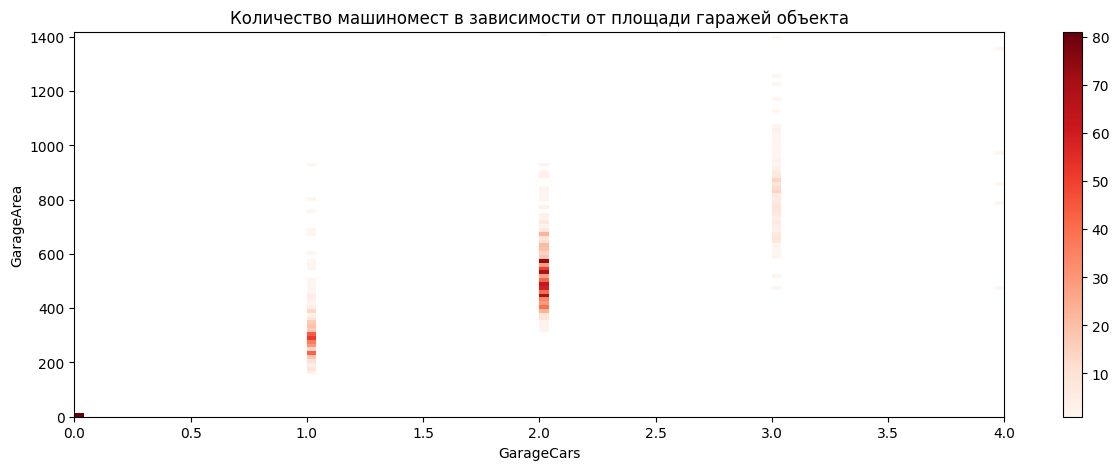

In [71]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['GarageCars'], y=df['GarageArea'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('GarageCars')
plt.ylabel('GarageArea')
plt.title('Количество машиномест в зависимости от площади гаражей объекта')
plt.colorbar()
plt.show();

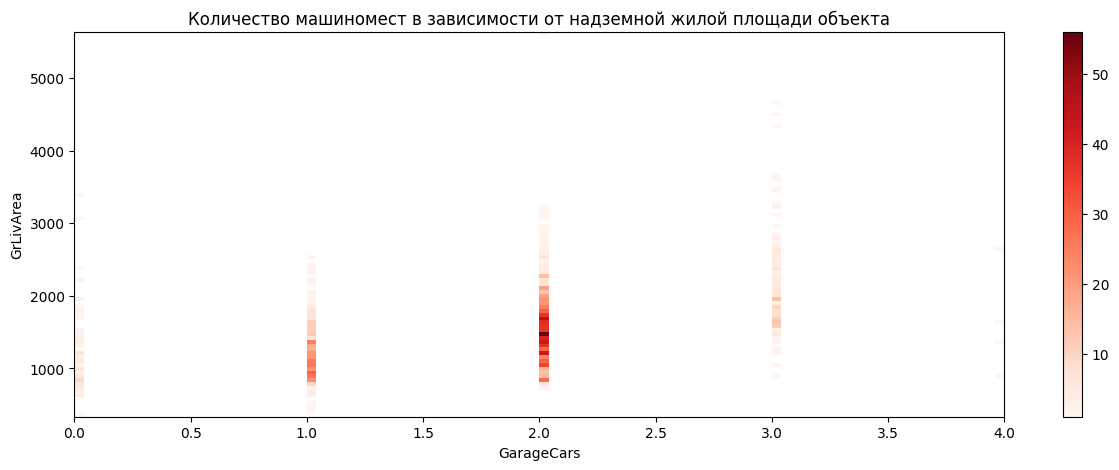

In [72]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['GarageCars'], y=df['GrLivArea'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('GarageCars')
plt.ylabel('GrLivArea')
plt.title('Количество машиномест в зависимости от надземной жилой площади объекта')
plt.colorbar()
plt.show();

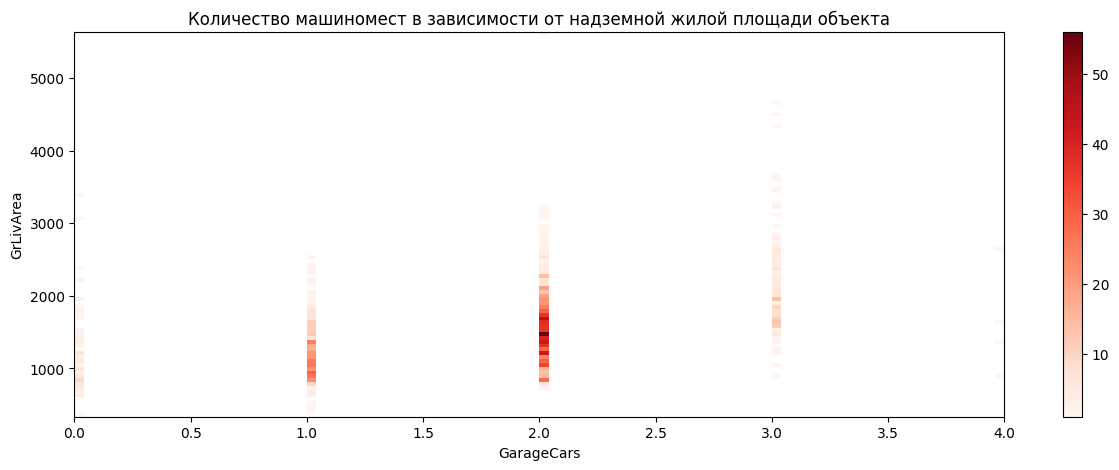

In [73]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['GarageCars'], y=df['GrLivArea'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('GarageCars')
plt.ylabel('GrLivArea')
plt.title('Количество машиномест в зависимости от надземной жилой площади объекта')
plt.colorbar()
plt.show();

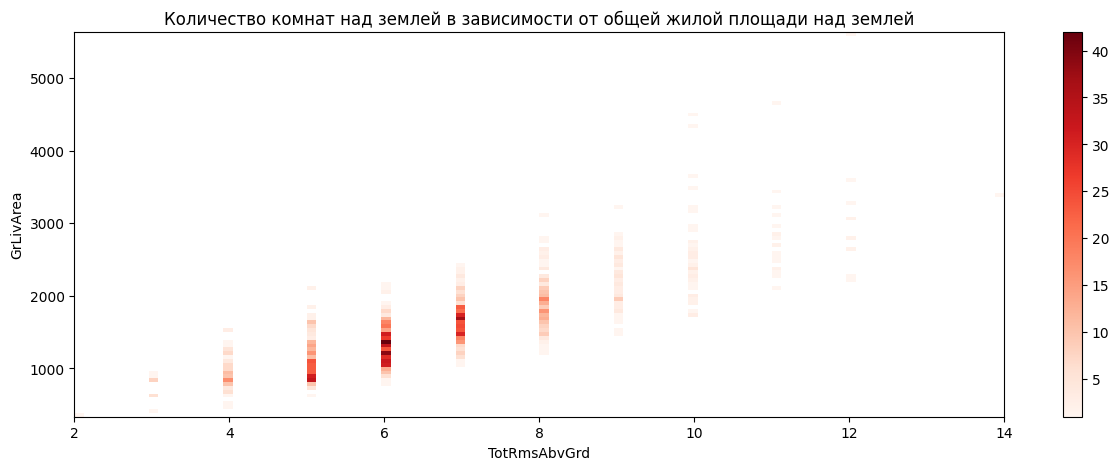

In [74]:
plt.figure(figsize=(15, 5))
plt.hist2d(x=df['TotRmsAbvGrd'], y=df['GrLivArea'], bins=(100, 100), cmap=plt.cm.Reds, cmin=0.1)
plt.xlabel('TotRmsAbvGrd')
plt.ylabel('GrLivArea')
plt.title('Количество комнат над землей в зависимости от общей жилой площади над землей')
plt.colorbar()
plt.show();

### 5. Преобразование (трансформация) признаков

#### a. one-hot encoding или label encoding

In [75]:
from sklearn.preprocessing import LabelEncoder

In [76]:
df["MSZoning"].value_counts()

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: count, dtype: int64

In [77]:
MSZoning_le = LabelEncoder() 
df["MSZoning"] = MSZoning_le.fit_transform(df["MSZoning"])

In [78]:
df[["MSZoning"]].head()

,MSZoning
0,3
1,3
2,3
3,3
4,3


In [79]:
df["MSZoning"].value_counts()

MSZoning
3    1151
4     218
1      65
2      16
0      10
Name: count, dtype: int64

In [80]:
df = pd.get_dummies(df, columns=["Street"])

In [81]:
df[["Street_Pave", "Street_Grvl"]].tail()

,Street_Pave,Street_Grvl
1455,True,False
1456,True,False
1457,True,False
1458,True,False
1459,True,False


In [82]:
df["Alley"].value_counts()

Alley
other    1369
Grvl       50
Pave       41
Name: count, dtype: int64

In [83]:
Alley_le = LabelEncoder() 
df["Alley"] = Alley_le.fit_transform(df["Alley"])

In [84]:
df["Alley"].value_counts()

Alley
2    1369
0      50
1      41
Name: count, dtype: int64

In [85]:
df["LotShape"].value_counts()

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: count, dtype: int64

In [86]:
LotShape_le = LabelEncoder() 
df["LotShape"] = LotShape_le.fit_transform(df["LotShape"])

In [87]:
df["LotShape"].value_counts()

LotShape
3    925
0    484
1     41
2     10
Name: count, dtype: int64

In [88]:
df["LandContour"].value_counts()

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: count, dtype: int64

In [89]:
LandContour_le = LabelEncoder() 
df["LandContour"] = LandContour_le.fit_transform(df["LandContour"])

In [90]:
df["LandContour"].value_counts()

LandContour
3    1311
0      63
1      50
2      36
Name: count, dtype: int64

In [91]:
df["Utilities"].value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [92]:
df = pd.get_dummies(df, columns=["Utilities"])

In [93]:
df[["Utilities_AllPub", "Utilities_NoSeWa"]].head()

,Utilities_AllPub,Utilities_NoSeWa
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False


In [94]:
df["LotConfig"].value_counts()

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: count, dtype: int64

In [95]:
LotConfig_le = LabelEncoder() 
df["LotConfig"] = LotConfig_le.fit_transform(df["LotConfig"])

In [96]:
df["LotConfig"].value_counts()

LotConfig
4    1052
0     263
1      94
2      47
3       4
Name: count, dtype: int64

In [97]:
df["Neighborhood"].value_counts()

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: count, dtype: int64

In [98]:
Neighborhood_le = LabelEncoder() 
df["Neighborhood"] = Neighborhood_le.fit_transform(df["Neighborhood"])

In [99]:
df["Neighborhood"].value_counts()

Neighborhood
12    225
5     150
17    113
7     100
21     86
8      79
16     77
19     74
14     73
20     59
3      58
6      51
11     49
15     41
23     38
9      37
4      28
22     25
18     25
10     17
0      17
2      16
24     11
13      9
1       2
Name: count, dtype: int64

In [100]:
df["Condition1"].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [101]:
Condition1_le = LabelEncoder() 
df["Condition1"] = Condition1_le.fit_transform(df["Condition1"])

In [102]:
df["Condition1"].value_counts()

Condition1
2    1260
1      81
0      48
6      26
4      19
5      11
3       8
8       5
7       2
Name: count, dtype: int64

In [103]:
df["Condition2"].value_counts()

Condition2
Norm      1445
Feedr        6
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64

In [104]:
Condition2_le = LabelEncoder() 
df["Condition2"] = Condition2_le.fit_transform(df["Condition2"])

In [105]:
df["Condition2"].value_counts()

Condition2
2    1445
1       6
0       2
7       2
4       2
3       1
6       1
5       1
Name: count, dtype: int64

In [106]:
df["BldgType"].value_counts()

BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: count, dtype: int64

In [107]:
BldgType_le = LabelEncoder() 
df["BldgType"] = BldgType_le.fit_transform(df["BldgType"])

In [108]:
df["BldgType"].value_counts()

BldgType
0    1220
4     114
2      52
3      43
1      31
Name: count, dtype: int64

In [109]:
df["HouseStyle"].value_counts()

HouseStyle
1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: count, dtype: int64

In [110]:
HouseStyle_le = LabelEncoder() 
df["HouseStyle"] = HouseStyle_le.fit_transform(df["HouseStyle"])

In [111]:
df["HouseStyle"].value_counts()

HouseStyle
2    726
5    445
0    154
7     65
6     37
1     14
4     11
3      8
Name: count, dtype: int64

In [112]:
df["RoofStyle"].value_counts()

RoofStyle
Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: count, dtype: int64

In [113]:
RoofStyle_le = LabelEncoder() 
df["RoofStyle"] = RoofStyle_le.fit_transform(df["RoofStyle"])

In [114]:
df["RoofStyle"].value_counts()

RoofStyle
1    1141
3     286
0      13
2      11
4       7
5       2
Name: count, dtype: int64

In [115]:
df["RoofMatl"].value_counts()

RoofMatl
CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64

In [116]:
RoofMatl_le = LabelEncoder() 
df["RoofMatl"] = RoofMatl_le.fit_transform(df["RoofMatl"])

In [117]:
df["RoofMatl"].value_counts()

RoofMatl
1    1434
5      11
7       6
6       5
3       1
2       1
4       1
0       1
Name: count, dtype: int64

In [118]:
df["Exterior1st"].value_counts()

Exterior1st
VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
AsphShn      1
ImStucc      1
CBlock       1
Name: count, dtype: int64

In [119]:
Exterior1st_le = LabelEncoder() 
df["Exterior1st"] = Exterior1st_le.fit_transform(df["Exterior1st"])

In [120]:
df["Exterior1st"].value_counts()

Exterior1st
12    515
6     222
8     220
13    206
9     108
5      61
3      50
14     26
11     25
0      20
2       2
10      2
1       1
7       1
4       1
Name: count, dtype: int64

In [121]:
df["Exterior2nd"].value_counts()

Exterior2nd
VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Stone        5
AsphShn      3
Other        1
CBlock       1
Name: count, dtype: int64

In [122]:
Exterior2nd_le = LabelEncoder() 
df["Exterior2nd"] = Exterior2nd_le.fit_transform(df["Exterior2nd"])

In [123]:
df["Exterior2nd"].value_counts()

Exterior2nd
13    504
8     214
6     207
14    197
10    142
5      60
15     38
12     26
3      25
0      20
7      10
2       7
11      5
1       3
9       1
4       1
Name: count, dtype: int64

In [124]:
df["MasVnrType"].value_counts()

MasVnrType
Other      872
BrkFace    445
Stone      128
BrkCmn      15
Name: count, dtype: int64

In [125]:
MasVnrType_le = LabelEncoder() 
df["MasVnrType"] = MasVnrType_le.fit_transform(df["MasVnrType"])

In [126]:
df["MasVnrType"].value_counts()

MasVnrType
2    872
1    445
3    128
0     15
Name: count, dtype: int64

In [127]:
df["ExterQual"].value_counts()

ExterQual
TA    906
Gd    488
Ex     52
Fa     14
Name: count, dtype: int64

In [128]:
ExterQual_le = LabelEncoder() 
df["ExterQual"] = ExterQual_le.fit_transform(df["ExterQual"])

In [129]:
df["ExterQual"].value_counts()

ExterQual
3    906
2    488
0     52
1     14
Name: count, dtype: int64

In [130]:
df["ExterCond"].value_counts()

ExterCond
TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: count, dtype: int64

In [131]:
ExterCond_le = LabelEncoder() 
df["ExterCond"] = ExterCond_le.fit_transform(df["ExterCond"])

In [132]:
df["ExterCond"].value_counts()

ExterCond
4    1282
2     146
1      28
0       3
3       1
Name: count, dtype: int64

In [133]:
df["Foundation"].value_counts()

Foundation
PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: count, dtype: int64

In [134]:
Foundation_le = LabelEncoder() 
df["Foundation"] = Foundation_le.fit_transform(df["Foundation"])

In [135]:
df["Foundation"].value_counts()

Foundation
2    647
1    634
0    146
3     24
4      6
5      3
Name: count, dtype: int64

In [136]:
df["BsmtQual"].value_counts()

BsmtQual
TA    649
Gd    618
Ex    121
No     37
Fa     35
Name: count, dtype: int64

In [137]:
BsmtQual_le = LabelEncoder() 
df["BsmtQual"] = BsmtQual_le.fit_transform(df["BsmtQual"])

In [138]:
df["BsmtQual"].value_counts()

BsmtQual
4    649
2    618
0    121
3     37
1     35
Name: count, dtype: int64

In [139]:
df["BsmtCond"].value_counts()

BsmtCond
TA    1311
Gd      65
Fa      45
No      37
Po       2
Name: count, dtype: int64

In [140]:
LotConfig_le = LabelEncoder() 
df["BsmtCond"] = LotConfig_le.fit_transform(df["BsmtCond"])

In [141]:
df["BsmtCond"].value_counts()

BsmtCond
4    1311
1      65
0      45
2      37
3       2
Name: count, dtype: int64

In [142]:
df["BsmtExposure"].value_counts()

BsmtExposure
No    991
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

In [143]:
BsmtExposure_le = LabelEncoder() 
df["BsmtExposure"] = BsmtExposure_le.fit_transform(df["BsmtExposure"])

In [144]:
df["BsmtExposure"].value_counts()

BsmtExposure
3    991
0    221
1    134
2    114
Name: count, dtype: int64

In [145]:
df["BsmtFinType1"].value_counts()

BsmtFinType1
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
No      37
Name: count, dtype: int64

In [146]:
BsmtFinType1_le = LabelEncoder() 
df["BsmtFinType1"] = BsmtFinType1_le.fit_transform(df["BsmtFinType1"])

In [147]:
df["BsmtFinType1"].value_counts()

BsmtFinType1
6    430
2    418
0    220
1    148
5    133
3     74
4     37
Name: count, dtype: int64

In [148]:
df["BsmtFinType2"].value_counts()

BsmtFinType2
Unf    1256
Rec      54
LwQ      46
No       38
BLQ      33
ALQ      19
GLQ      14
Name: count, dtype: int64

In [149]:
BsmtFinType2_le = LabelEncoder() 
df["BsmtFinType2"] = BsmtFinType2_le.fit_transform(df["BsmtFinType2"])

In [150]:
df["BsmtFinType2"].value_counts()

BsmtFinType2
6    1256
5      54
3      46
4      38
1      33
0      19
2      14
Name: count, dtype: int64

In [151]:
df["Heating"].value_counts()

Heating
GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: count, dtype: int64

In [152]:
Heating_le = LabelEncoder() 
df["Heating"] = Heating_le.fit_transform(df["Heating"])

In [153]:
df["Heating"].value_counts()

Heating
1    1428
2      18
3       7
5       4
4       2
0       1
Name: count, dtype: int64

In [154]:
df["HeatingQC"].value_counts()

HeatingQC
Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: count, dtype: int64

In [155]:
HeatingQC_le = LabelEncoder() 
df["HeatingQC"] = HeatingQC_le.fit_transform(df["HeatingQC"])

In [156]:
df["HeatingQC"].value_counts()

HeatingQC
0    741
4    428
2    241
1     49
3      1
Name: count, dtype: int64

In [157]:
df["CentralAir"].value_counts()

CentralAir
True     1365
False      95
Name: count, dtype: int64

In [158]:
CentralAir_le = LabelEncoder() 
df["CentralAir"] = CentralAir_le.fit_transform(df["CentralAir"])

In [159]:
df["CentralAir"].value_counts()

CentralAir
1    1365
0      95
Name: count, dtype: int64

In [160]:
df["Electrical"].value_counts()

Electrical
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         2
Name: count, dtype: int64

In [161]:
Electrical_le = LabelEncoder() 
df["Electrical"] = Electrical_le.fit_transform(df["Electrical"])

In [162]:
df["Electrical"].value_counts()

Electrical
4    1334
0      94
1      27
2       3
3       2
Name: count, dtype: int64

In [163]:
df["KitchenQual"].value_counts()

KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64

In [164]:
KitchenQual_le = LabelEncoder() 
df["KitchenQual"] = KitchenQual_le.fit_transform(df["KitchenQual"])

In [165]:
df["KitchenQual"].value_counts()

KitchenQual
3    735
2    586
0    100
1     39
Name: count, dtype: int64

In [166]:
df["Functional"].value_counts()

Functional
Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: count, dtype: int64

In [167]:
Functional_le = LabelEncoder() 
df["Functional"] = Functional_le.fit_transform(df["Functional"])

In [168]:
df["Functional"].value_counts()

Functional
6    1360
3      34
2      31
4      15
0      14
1       5
5       1
Name: count, dtype: int64

In [169]:
df["FireplaceQu"].value_counts()

FireplaceQu
No    690
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [170]:
FireplaceQu_le = LabelEncoder() 
df["FireplaceQu"] = FireplaceQu_le.fit_transform(df["FireplaceQu"])

In [171]:
df["FireplaceQu"].value_counts()

FireplaceQu
3    690
2    380
5    313
1     33
0     24
4     20
Name: count, dtype: int64

In [172]:
df["GarageType"].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
No          81
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

In [173]:
GarageType_le = LabelEncoder() 
df["GarageType"] = GarageType_le.fit_transform(df["GarageType"])

In [174]:
df["GarageType"].value_counts()

GarageType
1    870
5    387
3     88
6     81
2     19
4      9
0      6
Name: count, dtype: int64

In [175]:
df["GarageFinish"].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
No      81
Name: count, dtype: int64

In [176]:
GarageFinish_le = LabelEncoder() 
df["GarageFinish"] = GarageFinish_le.fit_transform(df["GarageFinish"])

In [177]:
df["GarageFinish"].value_counts()

GarageFinish
3    605
2    422
0    352
1     81
Name: count, dtype: int64

In [178]:
df["GarageQual"].value_counts()

GarageQual
TA    1311
No      81
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [179]:
GarageQual_le = LabelEncoder() 
df["GarageQual"] = GarageQual_le.fit_transform(df["GarageQual"])

In [180]:
df["GarageQual"].value_counts()

GarageQual
5    1311
3      81
1      48
2      14
0       3
4       3
Name: count, dtype: int64

In [181]:
df["GarageCond"].value_counts()

GarageCond
TA    1326
No      81
Fa      35
Gd       9
Po       7
Ex       2
Name: count, dtype: int64

In [182]:
GarageCond_le = LabelEncoder() 
df["GarageCond"] = GarageCond_le.fit_transform(df["GarageCond"])

In [183]:
df["GarageCond"].value_counts()

GarageCond
5    1326
3      81
1      35
2       9
4       7
0       2
Name: count, dtype: int64

In [184]:
df["PavedDrive"].value_counts()

PavedDrive
Y    1340
N      90
P      30
Name: count, dtype: int64

In [185]:
PavedDrive_le = LabelEncoder() 
df["PavedDrive"] = PavedDrive_le.fit_transform(df["PavedDrive"])

In [186]:
df["PavedDrive"].value_counts()

PavedDrive
2    1340
0      90
1      30
Name: count, dtype: int64

In [187]:
df["PoolQC"].value_counts()

PoolQC
No    1453
Gd       3
Ex       2
Fa       2
Name: count, dtype: int64

In [188]:
PoolQC_le = LabelEncoder() 
df["PoolQC"] = PoolQC_le.fit_transform(df["PoolQC"])

In [189]:
df["PoolQC"].value_counts()

PoolQC
3    1453
2       3
0       2
1       2
Name: count, dtype: int64

In [190]:
df["Fence"].value_counts()

Fence
No       1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: count, dtype: int64

In [191]:
Fence_le = LabelEncoder() 
df["Fence"] = Fence_le.fit_transform(df["Fence"])

In [192]:
df["Fence"].value_counts()

Fence
4    1179
2     157
0      59
1      54
3      11
Name: count, dtype: int64

In [193]:
df["MiscFeature"].value_counts()

MiscFeature
No      1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: count, dtype: int64

In [194]:
MiscFeature_le = LabelEncoder() 
df["MiscFeature"] = MiscFeature_le.fit_transform(df["MiscFeature"])

In [195]:
df["MiscFeature"].value_counts()

MiscFeature
1    1406
3      49
0       2
2       2
4       1
Name: count, dtype: int64

In [196]:
df["SaleType"].value_counts()

SaleType
WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: count, dtype: int64

In [197]:
SaleType_le = LabelEncoder() 
df["SaleType"] = SaleType_le.fit_transform(df["SaleType"])

In [198]:
df["SaleType"].value_counts()

SaleType
8    1267
6     122
0      43
3       9
4       5
5       5
1       4
7       3
2       2
Name: count, dtype: int64

In [199]:
df["SaleCondition"].value_counts()

SaleCondition
Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: count, dtype: int64

In [200]:
SaleCondition_le = LabelEncoder() 
df["SaleCondition"] = SaleCondition_le.fit_transform(df["SaleCondition"])

In [201]:
df["SaleCondition"].value_counts()

SaleCondition
4    1198
5     125
0     101
3      20
2      12
1       4
Name: count, dtype: int64

In [202]:
df["LandSlope"].value_counts()

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: count, dtype: int64

In [203]:
LandSlope_le = LabelEncoder() 
df["LandSlope"] = LandSlope_le.fit_transform(df["LandSlope"])

In [204]:
df["LandSlope"].value_counts()

LandSlope
0    1382
1      65
2      13
Name: count, dtype: int64

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 84 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                1460 non-null   int64         
 1   MSSubClass        1460 non-null   int64         
 2   MSZoning          1460 non-null   int64         
 3   LotFrontage       1460 non-null   float64       
 4   LotArea           1460 non-null   int64         
 5   Alley             1460 non-null   int64         
 6   LotShape          1460 non-null   int64         
 7   LandContour       1460 non-null   int64         
 8   LotConfig         1460 non-null   int64         
 9   LandSlope         1460 non-null   int64         
 10  Neighborhood      1460 non-null   int64         
 11  Condition1        1460 non-null   int64         
 12  Condition2        1460 non-null   int64         
 13  BldgType          1460 non-null   int64         
 14  HouseStyle        1460 n

Как видно из вывода информации все поля имеют цифровой формат: Булевый, Целочисленный, Вещественный и тип Даты

#### b. При необходимости создайте новые характеристики

Создал ранее новый параметр **DataSold** на основе двух полей **YrSold** и **MonthSold**, т.к. он участвует в построении графиков и тесно связан продажами.

### 6. Сохранение данных в файле cleaned_house_prices.csv

In [206]:
df.to_csv("cleaned_house_prices.csv", index=False)